In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [3]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

In [4]:
def run():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

0 loss: 2.1767063
1 loss: 0.7601801
2 loss: 0.30831113
3 loss: 0.16250591
4 loss: 0.11390986
5 loss: 0.09628424
6 loss: 0.088615395
7 loss: 0.08423141
8 loss: 0.08100872
9 loss: 0.07826665
10 loss: 0.075782426
11 loss: 0.073478945
12 loss: 0.07132572
13 loss: 0.069307335
14 loss: 0.06741359
15 loss: 0.06563623
16 loss: 0.06396793
17 loss: 0.062401928
18 loss: 0.060931932
19 loss: 0.059552055
20 loss: 0.05825676
21 loss: 0.057040878
22 loss: 0.055899534
23 loss: 0.054828156
24 loss: 0.053822465
25 loss: 0.052878413
26 loss: 0.05199224
27 loss: 0.05116039
28 loss: 0.050379537
29 loss: 0.04964655
Predicting


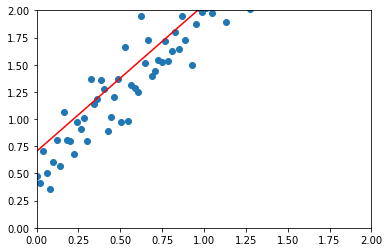

In [5]:
run()